# Logistic regression using Keras
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
#plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,5)

np.random.seed(42)

#===========================================================================
# Keras imports
#===========================================================================
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

## Create some synthetic data

In [2]:
mu        = 220
sigma     = 50
n_numbers = 1000

data = (np.random.randn(n_numbers) * sigma + mu).astype('int')
times = data.tolist()

X  = np.arange(0,241)
df = pd.DataFrame(X, columns = ['X'])
df["y"] = 0

for i in times:
    if i <= 240:
        df.loc[i, "y"] = 1

X = df["X"].values
y = df["y"]

## Scale the data

In [3]:
# para una red nuronal es importante a escalar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

## Our model

In [4]:
#===========================================================================
# build the keras model
#===========================================================================
model = Sequential()

n_neurons   = 1
model.add(Dense(n_neurons, activation='sigmoid'))

#===========================================================================
# compile the keras model
#===========================================================================
# solve using stochastic gradient descent (SGD)
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.3)) # default value 0.01

## Fit the data

In [5]:
%%time

#===========================================================================
# fit or "train" the model
#===========================================================================
model.fit(X_scaled.reshape(-1, 1), y,
          epochs  = 500,
          verbose = 0)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

CPU times: user 26.2 s, sys: 1.02 s, total: 27.3 s
Wall time: 27.9 s


## Predict

In [6]:
#===========================================================================
# make predictions
#===========================================================================
df["y_NN"]  = model.predict(X_scaled.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


## Results

In [7]:
# also overlay a logistic regression for comparison
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty= None)
classifier.fit(X_scaled.reshape(-1, 1), y)
df["y_NN_LR"]  = classifier.predict_proba(X_scaled.reshape(-1, 1))[:,1]

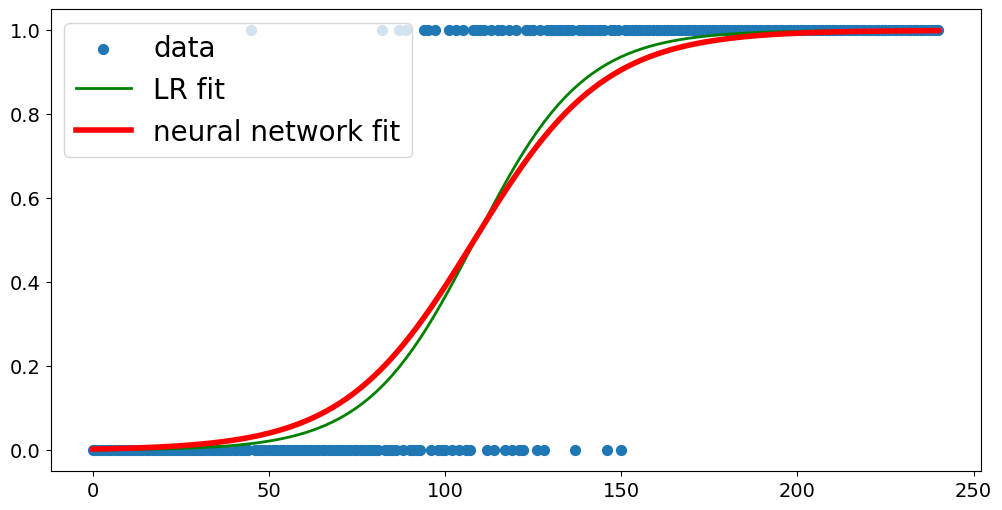

In [8]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(X,y, s=50, label='data')
plt.plot(X, df["y_NN_LR"], color="green", lw=2, label='LR fit')
plt.plot(X, df["y_NN"], color="red", lw=4, label='neural network fit')
plt.legend(loc='upper left', fontsize=20);